### Introduction.
In this project, we will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

### Import packages.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read the dataset.

In [4]:
#if you want to add the existing index column correlation matrix calculation, don't use index_col parameter here.
medi_data = pd.read_csv("medical_examination.csv")
medi_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data description.
The rows in the dataset represent patients and the columns represent informations like body measurements, results from various blood tests, and lifestyle choices.
In more detail, We have 12 columns except the `id` column. Below chart describe the dataset.

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age     | Objective Feature | age | int (days) |
| Height  | Objective Feature | height | int (cm) |
| Weight  | Objective Feature | weight | float (kg) |
| Gender  | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

We have 4 objective features. They represent the basic informations like `Age`, `Height`, `Weight`, and `Gender` of a patient.

We have 4 examination features. The values of these features are collected from various medical tests.

**Examinations features:**  
1. `Systolic blood pressure` – indicates how much pressure your blood is exerting against your artery walls when the heart beats.
2. `Diastolic blood pressure` – indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. [reference](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

3. `Cholesterol` - a waxy type of fat, or lipid, which moves throughout your body in your blood. [reference](https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)

4. `Glucose` - one of a group of carbohydrates known as simple sugars (monosaccharides) [reference](https://www.britannica.com/science/glucose)

Subjective features are represents the lifestyle choices of a patient.  
They are `smoking or non smoking`, `Alcohol Intake`, `Physical Activity`

Target variable which means the variable whose values are to be modeled and predicted by other variables is `the presence or absence of cardiovascular disease`

*Data source:
Freecodecamp medical data visualizer project.*

In [5]:
medi_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Calculating the BMI Value
BMI (Body Mass Index) is a person's weight in kilograms divided by the square of height in meters. Basically, BMI value is a indicator of high body fatness.

In our medical examination data set, height values are recorded in centimeters. To calculate the BMI value, first we need to convert all height values to meters.

In [6]:
medi_data['height'] = medi_data['height']/100 #convert all the height values to meters.
medi_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


In [7]:
medi_data['height'].dtype #checking the data type of height

dtype('float64')

In [8]:
medi_data['weight'].dtype #checking the data type of weight

dtype('float64')

In [9]:
medi_data['overweight'] = medi_data['weight']/(medi_data['height']*medi_data['height']) # Adding a overweight column to the data set.
medi_data.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805


In [10]:
#Convert the overweight column values to binary with specific overweight condition.
#If the overweight value is > 25 then the person is overweight.
medi_data['overweight'] = medi_data['overweight'].apply(lambda x: 1 if x>=25 else 0)
medi_data.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1


### Normalizing the data
Examination features like `cholesterol` and `glucose` columns has three value types. They are 1 for normal, 2 for above normal, 3 for well above normal. We can normalize this value types to binary like this. 0 for normal 1 for not-normal.

In [11]:
#normalize the cholesterol column
medi_data['cholesterol'] = medi_data['cholesterol'].apply(lambda x: 1 if x > 1 else 0)

#normalize the gluc column
medi_data['gluc'] = medi_data['gluc'].apply(lambda x: 1 if x > 1 else 0)

medi_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


### Visualize
Now we can visualize the data as follows to study more insights and discover patterns.

In [12]:
#create a dataframe using the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
medi_data_cat = pd.melt(medi_data, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

#group and reformat the newly created dataframe.
medi_data_cat = pd.DataFrame(medi_data_cat.groupby(by=['cardio', 'variable', 'value']).size().reset_index(name='total'))

medi_data_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15908
9,0,overweight,1,19113


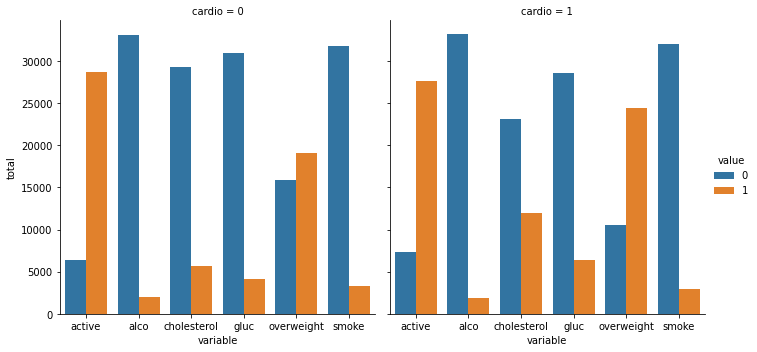

In [13]:
sns.catplot(x='variable',y='total',hue='value', col='cardio', data=medi_data_cat, kind='bar')

### Data Cleaning.
We need to filter out the following patient segments that represents incorect data.
1. diastolic pressure is higher than systolic
2. height is less than the 2.5th percentile
3. height is more than the 97.5th percentile
4. weight is less than the 2.5th percentile
5. weight is more than the 97.5th percentile

In [14]:
cleaned_data = medi_data[(medi_data['ap_lo'] <= medi_data['ap_hi'])
          &(medi_data['height'] >= medi_data['height'].quantile(0.025))
          &(medi_data['height'] <= medi_data['height'].quantile(0.975))
          &(medi_data['weight'] >= medi_data['weight'].quantile(0.025))
          &(medi_data['weight'] <= medi_data['weight'].quantile(0.975))]

In [15]:
cleaned_data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


In [16]:
#create a corerelation matrix.
matrix = cleaned_data.corr()

matrix

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000592
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089380
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052423
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.148628
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.656261
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017322
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172314
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.128061
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088127
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003057


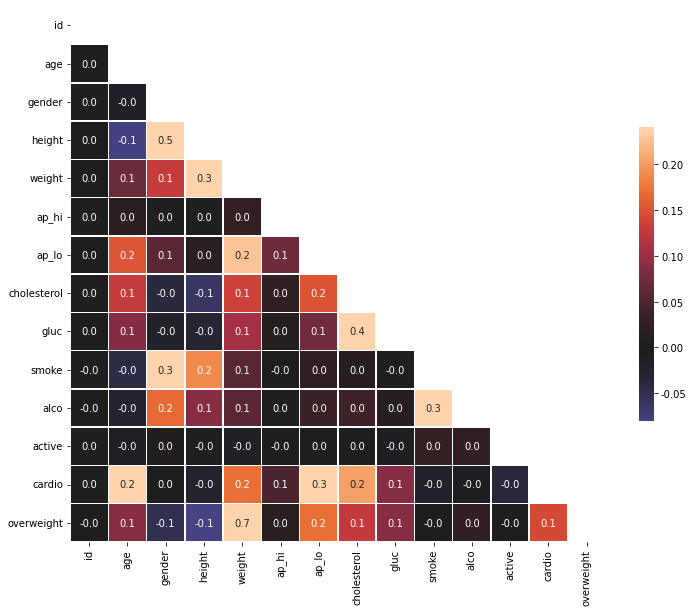

In [17]:
#creating the mask.
mask = np.triu(np.ones_like(matrix))

plt.subplots(figsize=(12, 12))

#plotting the triangle correlation heatmap.
sns.heatmap(matrix, linewidths=.5, annot=True, fmt='.1f', mask=mask, square=True, center=0, vmin=-0.08, vmax=0.24, cbar_kws={'shrink': .45,'format': '%.2f'})